[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sbdar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sbdar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sbdar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
  2%|█▏                                                                        | 2402/156060 [00:01<01:38, 1565.55it/s]C:\Users\sbdar\AppData\Local\Temp\ipykernel_24360\1132509574.py:50: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(sent, features="lxml").get_text()
100%|██████████████████████████████████████████████████████████████████████████| 66292/66292 [00:42<00:00, 1545.22it/s]


156060
66292


100%|██████████████████████████████████████████████████████████████████████| 124848/124848 [00:00<00:00, 334457.11it/s]


13736
48
(124848, 48) (31212, 48) (66292, 48)


C:\Users\sbdar\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
488/488 ━━━━━━━━━━━━━━━━━━━━ 359s 704ms/step - accuracy: 0.5390 - loss: 1.1504 - val_accuracy: 0.6473 - val_loss: 0.8541
Epoch 2/6


C:\Users\sbdar\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


488/488 ━━━━━━━━━━━━━━━━━━━━ 302s 620ms/step - accuracy: 0.6543 - loss: 0.8426 - val_accuracy: 0.6565 - val_loss: 0.8337
Epoch 3/6
488/488 ━━━━━━━━━━━━━━━━━━━━ 303s 621ms/step - accuracy: 0.6824 - loss: 0.7654 - val_accuracy: 0.6628 - val_loss: 0.8318
Epoch 4/6
488/488 ━━━━━━━━━━━━━━━━━━━━ 299s 613ms/step - accuracy: 0.6986 - loss: 0.7279 - val_accuracy: 0.6640 - val_loss: 0.8391
Epoch 5/6
488/488 ━━━━━━━━━━━━━━━━━━━━ 284s 582ms/step - accuracy: 0.7096 - loss: 0.6998 - val_accuracy: 0.6641 - val_loss: 0.8457
Epoch 6/6
488/488 ━━━━━━━━━━━━━━━━━━━━ 338s 693ms/step - accuracy: 0.7186 - loss: 0.6800 - val_accuracy: 0.6656 - val_loss: 0.8702


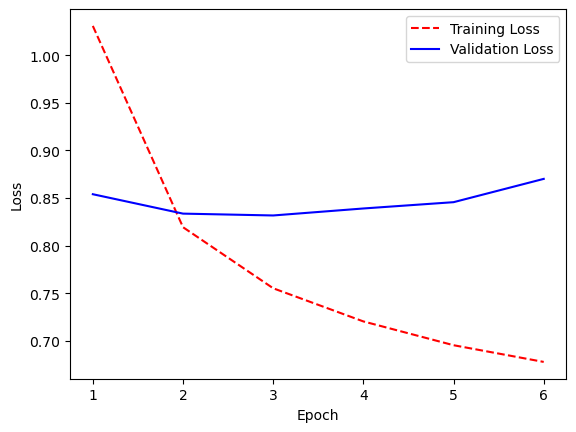

2072/2072 ━━━━━━━━━━━━━━━━━━━━ 128s 61ms/step


In [19]:
import numpy as np
import pandas as pd
import os
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
from keras.utils import to_categorical
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential

tf.random.set_seed(123)
random.seed(123)

# Load data
train = pd.read_csv("train.tsv", sep="\t")
test = pd.read_csv("test.tsv", sep="\t")

# Handle missing values
train['Phrase'] = train['Phrase'].fillna('')
test['Phrase'] = test['Phrase'].fillna('')

def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['Phrase']):
        if not isinstance(sent, str):
            sent = str(sent)  # Convert non-string values to string
        
        # remove html content
        review_text = BeautifulSoup(sent, features="lxml").get_text()

        # remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]", " ", review_text)

        # tokenize the sentences
        words = word_tokenize(review_text.lower())
        # lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
        reviews.append(lemma_words)
        
    return reviews

train_sentences = clean_sentences(train)
test_sentences = clean_sentences(test)
print(len(train_sentences))
print(len(test_sentences))

target = train.Sentiment.values
y_target = to_categorical(target)
num_classes = y_target.shape[1]

X_train, X_val, y_train, y_val = train_test_split(train_sentences, y_target, test_size=0.2, stratify=y_target)

unique_words = set()
len_max = 0
for sent in tqdm(X_train):
    unique_words.update(sent)
    if len_max < len(sent):
        len_max = len(sent)

print(len(list(unique_words)))
print(len_max)

tokenizer = Tokenizer(num_words=len(list(unique_words)))
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(test_sentences)

X_train = pad_sequences(X_train, maxlen=len_max)
X_val = pad_sequences(X_val, maxlen=len_max)
X_test = pad_sequences(X_test, maxlen=len_max)
print(X_train.shape, X_val.shape, X_test.shape)

early_stopping = EarlyStopping(min_delta=0.001, mode='max', monitor='val_acc', patience=2)
callback = [early_stopping]

model = Sequential()
model.add(Embedding(len(list(unique_words)), 300, input_length=len_max))
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5, return_sequences=False))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=6, batch_size=256, verbose=1, callbacks=callback)

import matplotlib.pyplot as plt

epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

y_pred = model.predict(X_test)
sub_file = pd.read_csv('sampleSubmission.csv', sep=',')
sub_file.Sentiment = y_pred
sub_file.to_csv('Submission.csv', index=False)


In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 1.1 MB/s eta 0:05:54
   ---------------------------------------- 0.1/385.2 MB 1.6 MB/s eta 0:03:57
   ---------------------------------------- 0.2/385.2 MB 1.5 MB/s eta 0:04:19
   ---------------------------------------- 0.2/385.2 MB 1.4 MB/s eta 0:04:42
   ---------------------------------------- 0.3/385.2 MB 1.3 MB/s eta 0:05:04
   ---------------------------------------- 0.4/385.2 MB 1.2 MB/s eta 0:05:27
   ---------------------------------------- 0.4/385.2 MB 1.2 MB/s eta 0:05:10
   ---------------------------------------- 0.5/385.2 MB 1.1 MB/s eta 0:05:42
   ---------------------------------------- 0.5/385.2 MB 1.1 MB/s eta 0:05:42
   ---------------------------------------- 0.6/385.2 MB 1.1 MB/s eta 0:05:55
   ---------------------------------------- 0.6/385.2 MB 1.1 MB/s eta 0:05:37
   ---------------------------------------- 0.7/385.2 MB 1.2 MB/s eta 0

In [9]:
!pip install keras
